In [1]:
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn as sns#Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

In [2]:
lyrics_df = pd.read_csv("cleaned_lyrics_year.csv")
lyrics_df['genre'] = lyrics_df['genre'].astype('category')
lyrics_df

,year,artist,genre,lyrics,normalized
0,2009,beyonce-knowles,Pop,"oh baby, how you doing? you know i'm gonna cut...","['oh', 'baby', 'know', 'be', 'gon', 'na', 'cut..."
1,2009,beyonce-knowles,Pop,"playin' everything so easy, it's like you seem...","['playin', 'easy', 'like', 'sure', 'way', 'not..."
2,2009,beyonce-knowles,Pop,if you search for tenderness it isn't hard to ...,"['search', 'tenderness', 'hard', 'find', 'love..."
3,2009,beyonce-knowles,Pop,"oh oh oh i, oh oh oh i if i wrote a book abo...","['oh', 'oh', 'oh', 'oh', 'oh', 'oh', 'write', ..."
4,2009,beyonce-knowles,Pop,"party the people, the people the party it's po...","['party', 'people', 'people', 'party', 'pop', ..."
...,...,...,...,...,...
210637,2012,edens-edge,Country,"i gotta say boy, after only just a couple of d...","['get', 'ta', 'boy', 'couple', 'date', 'hand',..."
210638,2012,edens-edge,Country,i helped you find her diamond ring you made me...,"['help', 'find', 'diamond', 'ring', 'try', 'to..."
210639,2012,edens-edge,Country,look at the couple in the corner booth looks a...,"['look', 'couple', 'corner', 'booth', 'look', ..."
210640,2012,edens-edge,Country,when i fly off this mortal earth and i'm measu...,"['fly', 'mortal', 'earth', 'be', 'measure', 'd..."


In [3]:
from multiprocessing import Pool
import ast
p = Pool(20)
lyrics_df['normalized'] = p.map(ast.literal_eval, lyrics_df['normalized'])
lyrics_df['normalized'][0]

['oh',
 'baby',
 'know',
 'be',
 'gon',
 'na',
 'cut',
 'right',
 'chase',
 'woman',
 'like',
 'think',
 'create',
 'special',
 'purpose',
 'know',
 'special',
 'feel',
 'baby',
 'let',
 'lose',
 'need',
 'work',
 'because',
 'boss',
 'real',
 'want',
 'feel',
 'consider',
 'lucky',
 'big',
 'deal',
 'get',
 'key',
 'heart',
 'have',
 'gon',
 'na',
 'need',
 'open',
 'body',
 'secret',
 'know',
 'inside',
 'need',
 'lie',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'ego',
 'love',
 'big',
 'ego',
 'walk',
 'like',
 'because',
 'usually',
 'be',
 'humble',
 'right',
 'choose',
 'leave',
 'blue',
 'arrogant',
 'confident',
 'decide',
 'find',
 'be',
 'work',
 'damn',
 'know',
 'be',
 'kill',
 'leg',
 'well',
 'thigh',
 'matt',
 'fact',
 'smile',
 'maybe',
 'eye',
 'boy',
 'site',
 'kind',
 'like',
 'big',
 'wide',
 'strong',
 'wo',
 'fit',
 'tough',
 'talk',
 'like',
 'because',
 'get',
 'big',
 'ego',
 'huge',
 'eg

In [4]:
from sklearn.model_selection import train_test_split
# train_test split
lyrics_train, lyrics_test = train_test_split(lyrics_df, test_size=0.3, random_state=0)

In [30]:
train_tuples = [(row['normalized'],[index,str(row['year']),row['genre']]) for index,row in lyrics_train.iterrows()]
train_tuples[0]

(['know',
  'believe',
  'like',
  'get',
  'ta',
  'movie',
  'screen',
  'cause',
  'god',
  'damn',
  'boy',
  'star',
  'old',
  'denim',
  'jeans',
  'thing',
  'set',
  'free',
  'stay',
  'night',
  'talk',
  'let',
  'drink',
  'boy',
  'lose',
  'need',
  'breathe',
  'heart',
  'beat',
  'twice',
  'fast',
  'like',
  'cigarette',
  'perfect',
  'match',
  'perfect',
  'match',
  'perfect',
  'match',
  'wanna',
  'stay',
  'late',
  'laugh',
  'night',
  'story',
  'tell',
  'live',
  'lie',
  'boy',
  'ride',
  'night',
  'know',
  'love',
  'style',
  'taste',
  'bitter',
  'sweet',
  'smile',
  'wo',
  'scream',
  'little',
  'nightmare',
  'dream',
  'need',
  'breathe',
  'heart',
  'beat',
  'twice',
  'fast',
  'like',
  'cigarette',
  'perfect',
  'match',
  'perfect',
  'match',
  'perfect',
  'match',
  'whisper',
  'call',
  'fall',
  'let',
  'hair',
  'sparkle',
  'let',
  'set',
  'free',
  'close',
  'eye',
  'close',
  'eye'],
 [42873, '2011', 'Pop'])

In [31]:
#Doc2vec
import gensim
train_tagged_lyrics = p.starmap(gensim.models.doc2vec.TaggedDocument, train_tuples)
train_tagged_lyrics[0]

TaggedDocument(words=['know', 'believe', 'like', 'get', 'ta', 'movie', 'screen', 'cause', 'god', 'damn', 'boy', 'star', 'old', 'denim', 'jeans', 'thing', 'set', 'free', 'stay', 'night', 'talk', 'let', 'drink', 'boy', 'lose', 'need', 'breathe', 'heart', 'beat', 'twice', 'fast', 'like', 'cigarette', 'perfect', 'match', 'perfect', 'match', 'perfect', 'match', 'wanna', 'stay', 'late', 'laugh', 'night', 'story', 'tell', 'live', 'lie', 'boy', 'ride', 'night', 'know', 'love', 'style', 'taste', 'bitter', 'sweet', 'smile', 'wo', 'scream', 'little', 'nightmare', 'dream', 'need', 'breathe', 'heart', 'beat', 'twice', 'fast', 'like', 'cigarette', 'perfect', 'match', 'perfect', 'match', 'perfect', 'match', 'whisper', 'call', 'fall', 'let', 'hair', 'sparkle', 'let', 'set', 'free', 'close', 'eye', 'close', 'eye'], tags=[42873, '2011', 'Pop'])

In [30]:
train_D2V_100 = gensim.models.doc2vec.Doc2Vec(train_tagged_lyrics, vector_size = 100,seed = 0,
                                              epochs=10, workers=30)

In [44]:
#train_D2V_100.train(train_tagged_lyrics, total_examples=train_D2V_100.corpus_count, epochs=40)
train_D2V_100.save('word embedding models/train_100.mm')

In [31]:
train_D2V_50 = gensim.models.doc2vec.Doc2Vec(train_tagged_lyrics, vector_size = 50,seed = 0,
                                             epochs=10, workers=30)
train_D2V_50.save('word embedding models/train_50.mm')

In [47]:
#train_D2V_50.train(train_tagged_lyrics, total_examples=train_D2V_100.corpus_count, epochs=40)
train_D2V_50.save('word embedding models/train_50.mm')

In [32]:
train_D2V_20 = gensim.models.doc2vec.Doc2Vec(train_tagged_lyrics, vector_size = 20,seed = 0,
                                             epochs=10, workers=30)
train_D2V_20.save('word embedding models/train_20.mm')

In [45]:
#train_D2V_20.train(train_tagged_lyrics, total_examples=train_D2V_100.corpus_count, epochs=40)
train_D2V_20.save('word embedding models/train_20.mm')

In [33]:
train_D2V_10 = gensim.models.doc2vec.Doc2Vec(train_tagged_lyrics, vector_size = 10,seed = 0,
                                             epochs=10, workers=30)
train_D2V_10.save('word embedding models/train_10.mm')

In [46]:
#train_D2V_10.train(train_tagged_lyrics, total_examples=train_D2V_100.corpus_count, epochs=40)
train_D2V_10.save('word embedding models/train_10.mm')

### Classification

In [6]:
import gensim
train_D2V_10 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/train_10.mm')
train_D2V_20 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/train_20.mm')
train_D2V_50 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/train_50.mm')
train_D2V_100 = gensim.models.doc2vec.Doc2Vec.load('word embedding models/train_100.mm')

In [7]:
train_embedding_10 = np.array([list(train_D2V_10[index]) for index in lyrics_train.index])
train_embedding_20 = np.array([list(train_D2V_20[index]) for index in lyrics_train.index])
train_embedding_50 = np.array([list(train_D2V_50[index]) for index in lyrics_train.index])
train_embedding_100 = np.array([list(train_D2V_100[index]) for index in lyrics_train.index])

In [10]:
from multiprocessing import Pool
p = Pool()
test_embedding_10 = p.map(train_D2V_10.infer_vector, lyrics_test['normalized'])
test_embedding_20 = p.map(train_D2V_20.infer_vector, lyrics_test['normalized'])
test_embedding_50 = p.map(train_D2V_50.infer_vector, lyrics_test['normalized'])
test_embedding_100 = p.map(train_D2V_100.infer_vector, lyrics_test['normalized'])

In [37]:
# feature conversion
test_embedding_10 = np.array([list(x) for x in test_embedding_10])
test_embedding_20 = np.array([list(x) for x in test_embedding_20])
test_embedding_50 = np.array([list(x) for x in test_embedding_50])
test_embedding_100 = np.array([list(x) for x in test_embedding_100])

In [38]:
genre_dict = {}
for i, c in enumerate(pd.unique(lyrics_df['genre'])):
    genre_dict[c] = i
genre_dict

{'Pop': 0,
 'Hip-Hop': 1,
 'Rock': 2,
 'Metal': 3,
 'Country': 4,
 'Jazz': 5,
 'Electronic': 6,
 'Folk': 7,
 'R&B': 8,
 'Indie': 9}

In [39]:
lyrics_train['genre'] = lyrics_train['genre'].apply(lambda x:genre_dict[x])
lyrics_test['genre'] = lyrics_test['genre'].apply(lambda x:genre_dict[x])

/home/cytwill/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/cytwill/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [40]:
train_groups = lyrics_train.groupby(['genre'])
train_groups = dict(list(train_groups))
class_weights = {k:len(lyrics_train)/len(v) for k,v in train_groups.items()}
class_weights

{4: 14.898353036273619,
 6: 32.40637362637363,
 7: 125.16893039049236,
 1: 9.545478086359811,
 9: 71.1970062771608,
 5: 29.31974547623782,
 3: 10.074405575293795,
 0: 6.2238402768984,
 8: 64.4726716222125,
 2: 2.147430202583633}

In [41]:
class_bases = np.linspace(min(class_weights.values()),max(class_weights.values()),5)
class_weight_paras = []
for b in class_bases:
    candidate = {c:v+b for c,v in class_weights.items()}
    class_weight_paras.append(candidate)
class_weight_paras

[{4: 17.04578323885725,
  6: 34.553803828957264,
  7: 127.316360593076,
  1: 11.692908288943444,
  9: 73.34443647974443,
  5: 31.46717567882145,
  3: 12.221835777877429,
  0: 8.371270479482034,
  8: 66.62010182479614,
  2: 4.294860405167266},
 {4: 47.80115828583443,
  6: 65.30917887593444,
  7: 158.0717356400532,
  1: 42.44828333592062,
  9: 104.09981152672161,
  5: 62.222550725798634,
  3: 42.97721082485461,
  0: 39.126645526459214,
  8: 97.37547687177332,
  2: 35.05023545214445},
 {4: 78.55653333281163,
  6: 96.06455392291163,
  7: 188.82711068703037,
  1: 73.20365838289781,
  9: 134.8551865736988,
  5: 92.97792577277582,
  3: 73.73258587183179,
  0: 69.88202057343639,
  8: 128.1308519187505,
  2: 65.80561049912163},
 {4: 109.3119083797888,
  6: 126.81992896988882,
  7: 219.58248573400755,
  1: 103.95903342987499,
  9: 165.61056162067598,
  5: 123.733300819753,
  3: 104.48796091880898,
  0: 100.63739562041359,
  8: 158.8862269657277,
  2: 96.56098554609882},
 {4: 140.06728342676598,


In [42]:
# calculating sample weights for imbalanced sample
from sklearn.utils.class_weight import compute_sample_weight
train_sample_weights = compute_sample_weight(class_weight='balanced', y=lyrics_train['genre'])
train_sample_weights

array([0.62238403, 0.21474302, 0.62238403, ..., 0.21474302, 0.21474302,
       1.00744056])

In [43]:
sample_bases = np.linspace(min(train_sample_weights),max(train_sample_weights),5)
sample_bases

array([ 0.21474302,  3.29028052,  6.36581803,  9.44135553, 12.51689304])

In [44]:
sample_weight_paras = [train_sample_weights + x for x in sample_bases]

In [45]:
classifiers = {'NaiveBayes':sklearn.naive_bayes.GaussianNB(),
               'LogisticRegression':sklearn.linear_model.LogisticRegression(n_jobs=-1),
               'RandomForest':sklearn.ensemble.RandomForestClassifier(n_jobs=-1),
               }
from sklearn.model_selection import GridSearchCV
parameters = {'NaiveBayes':{'var_smoothing':10**np.linspace(-20,-10,5)},
              'LogisticRegression':{'C':10**np.linspace(-2,2,5),'class_weight':class_weight_paras},
              'RandomForest':{"max_depth":np.linspace(1,10,4),'class_weight':class_weight_paras},
             }

In [49]:
s4_df = pd.DataFrame(columns=['clf',
                              'test_f1_10','test_acc_10','test_roc_10',
                              'test_f1_20','test_acc_20','test_roc_20',
                              'test_f1_50','test_acc_50','test_roc_50',
                              'test_f1_100','test_acc_100','test_roc_100'])
s4_df

,clf,test_f1_10,test_acc_10,test_roc_10,test_f1_20,test_acc_20,test_roc_20,test_f1_50,test_acc_50,test_roc_50,test_f1_100,test_acc_100,test_roc_100


In [50]:
f1_scorer = sklearn.metrics.make_scorer(sklearn.metrics.f1_score,average='weighted')

In [51]:
lyrics_feature = {10:{'train':train_embedding_10,'test':test_embedding_10},
                  20:{'train':train_embedding_20,'test':test_embedding_20},
                  50:{'train':train_embedding_50,'test':test_embedding_50},
                  100:{'train':train_embedding_100,'test':test_embedding_100}
                 }

In [52]:
best_clfs = {}
for k in classifiers:
    row = [k]
    best_clfs[k] = {}
    for n in [10,20,50,100]:
        clf = GridSearchCV(estimator=classifiers[k], param_grid=parameters[k], scoring=f1_scorer, n_jobs=-1, cv=10)
        if k == "NaiveBayes":
            clf.fit(lyrics_feature[n]['train'], lyrics_train['genre'], sample_weight=sample_weight_paras[2])
        else:
            clf.fit(lyrics_feature[n]['train'], lyrics_train['genre'])
        
        row += [clf.score(lyrics_feature[n]['test'], lyrics_test['genre']), 
        sklearn.metrics.accuracy_score(lyrics_test['genre'],clf.predict(lyrics_feature[n]['test']))]                                                                                         
        row.append(sklearn.metrics.roc_auc_score(lyrics_test['genre'], 
                                                 clf.predict_proba(lyrics_feature[n]['test']), 
                                                 multi_class='ovo'))
        best_clfs[k][n] = clf.best_estimator_
        print("done {} {}".format(k,n))
    print(row)
    s4_df.loc[len(s4_df)] = row
s4_df

done NaiveBayes 10
done NaiveBayes 20
done NaiveBayes 50
done NaiveBayes 100
['NaiveBayes', 0.34800407474774525, 0.4173721772981185, 0.614382276603418, 0.33141408492785096, 0.3840140521893248, 0.5974246340491871, 0.2748862331690567, 0.30264428022091056, 0.5801140418862075, 0.21104979306197968, 0.23235168452201985, 0.574385456872702]


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done LogisticRegression 10


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done LogisticRegression 20


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done LogisticRegression 50


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done LogisticRegression 100
['LogisticRegression', 0.3002771421770654, 0.46975139651543685, 0.554056138566421, 0.3002771421770654, 0.46975139651543685, 0.5810065008017853, 0.3002771421770654, 0.46975139651543685, 0.6176833387769296, 0.3002771421770654, 0.46975139651543685, 0.6127843630620046]


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done RandomForest 10


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done RandomForest 20


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done RandomForest 50


/home/cytwill/.local/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


done RandomForest 100
['RandomForest', 0.4042362617011095, 0.5045812036143243, 0.6417906920431279, 0.37474392713151006, 0.49163673191650975, 0.6205227773936157, 0.362768077396183, 0.5029354517114237, 0.5958191539416402, 0.3628243062701852, 0.5007200164575191, 0.5856457602667812]


,clf,test_f1_10,test_acc_10,test_roc_10,test_f1_20,test_acc_20,test_roc_20,test_f1_50,test_acc_50,test_roc_50,test_f1_100,test_acc_100,test_roc_100
0,NaiveBayes,0.348004,0.417372,0.614382,0.331414,0.384014,0.597425,0.274886,0.302644,0.580114,0.211050,0.232352,0.574385
1,LogisticRegression,0.300277,0.469751,0.554056,0.300277,0.469751,0.581007,0.300277,0.469751,0.617683,0.300277,0.469751,0.612784
2,RandomForest,0.404236,0.504581,0.641791,0.374744,0.491637,0.620523,0.362768,0.502935,0.595819,0.362824,0.500720,0.585646


In [53]:
s4_df.to_csv('s4_results.csv',index=None)

### Feature Analysis

In [54]:
train_genre_embeddings = [train_D2V_100.docvecs[i] for i in pd.unique(lyrics_df['genre'])]

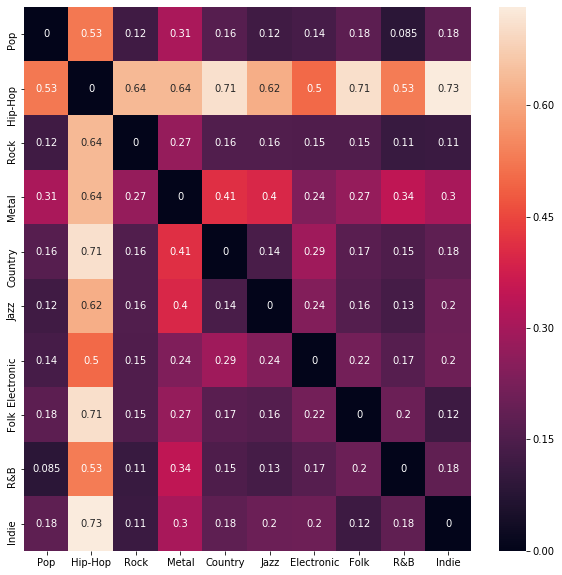

In [55]:
from scipy.spatial.distance import cosine
M = []
for p in train_genre_embeddings:
    L = []
    for q in train_genre_embeddings:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M),xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)
#plt.savefig('Pictures/word-embedding feature cosine.png')

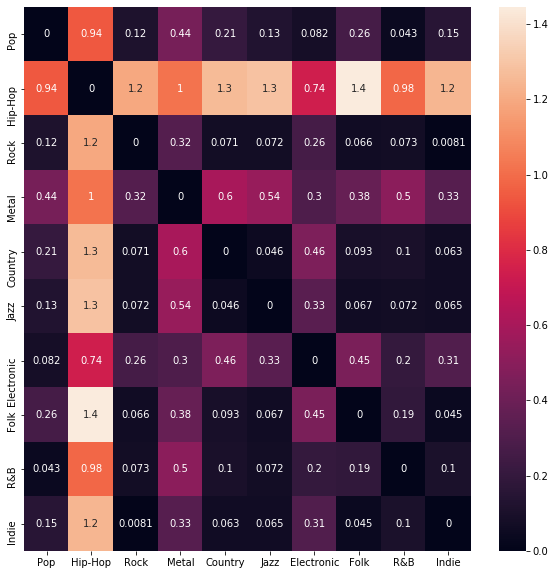

In [56]:
from scipy.spatial.distance import correlation
M = []
for p in train_genre_embeddings:
    L = []
    for q in train_genre_embeddings:
        L.append(correlation(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M),xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)
plt.savefig('Pictures/word-embedding feature correlation.png')

In [60]:
average_vecs = []
for k,i in genre_dict.items():
    df = train_groups[i]
    vecs = np.array([list(train_D2V_10[index]) for index in df.index])
    average_vecs.append(vecs.mean(axis=0))

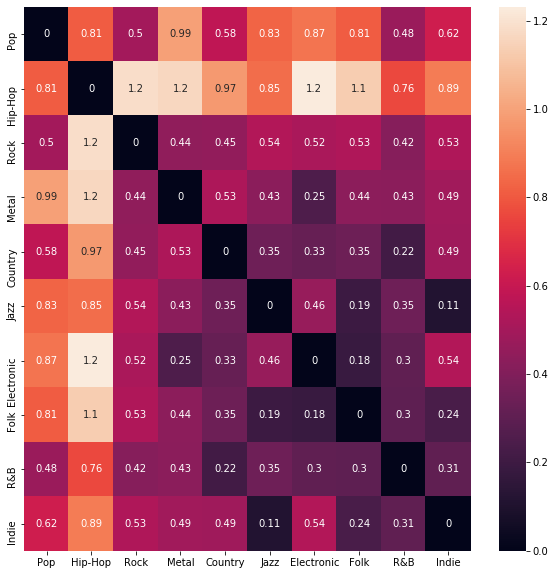

In [61]:
from scipy.spatial.distance import cosine
M = []
for p in average_vecs:
    L = []
    for q in average_vecs:
        L.append(cosine(p,q))
    M.append(L)
plt.rcParams['figure.figsize'] = [10,10]
sns.heatmap(np.array(M),xticklabels=pd.unique(lyrics_df['genre']), 
            yticklabels=pd.unique(lyrics_df['genre']), annot=True)

In [62]:
from MulticoreTSNE import MulticoreTSNE 
tsne = MulticoreTSNE(n_jobs=30)
test_tsne = tsne.fit_transform(test_embedding_10)
test_tsne.shape

(63193, 2)

In [63]:
ind2cat = {v:k for k,v in genre_dict.items()}
ind2cat

{0: 'Pop',
 1: 'Hip-Hop',
 2: 'Rock',
 3: 'Metal',
 4: 'Country',
 5: 'Jazz',
 6: 'Electronic',
 7: 'Folk',
 8: 'R&B',
 9: 'Indie'}

In [64]:
test_labels = [ind2cat[g] for g in lyrics_test['genre']]

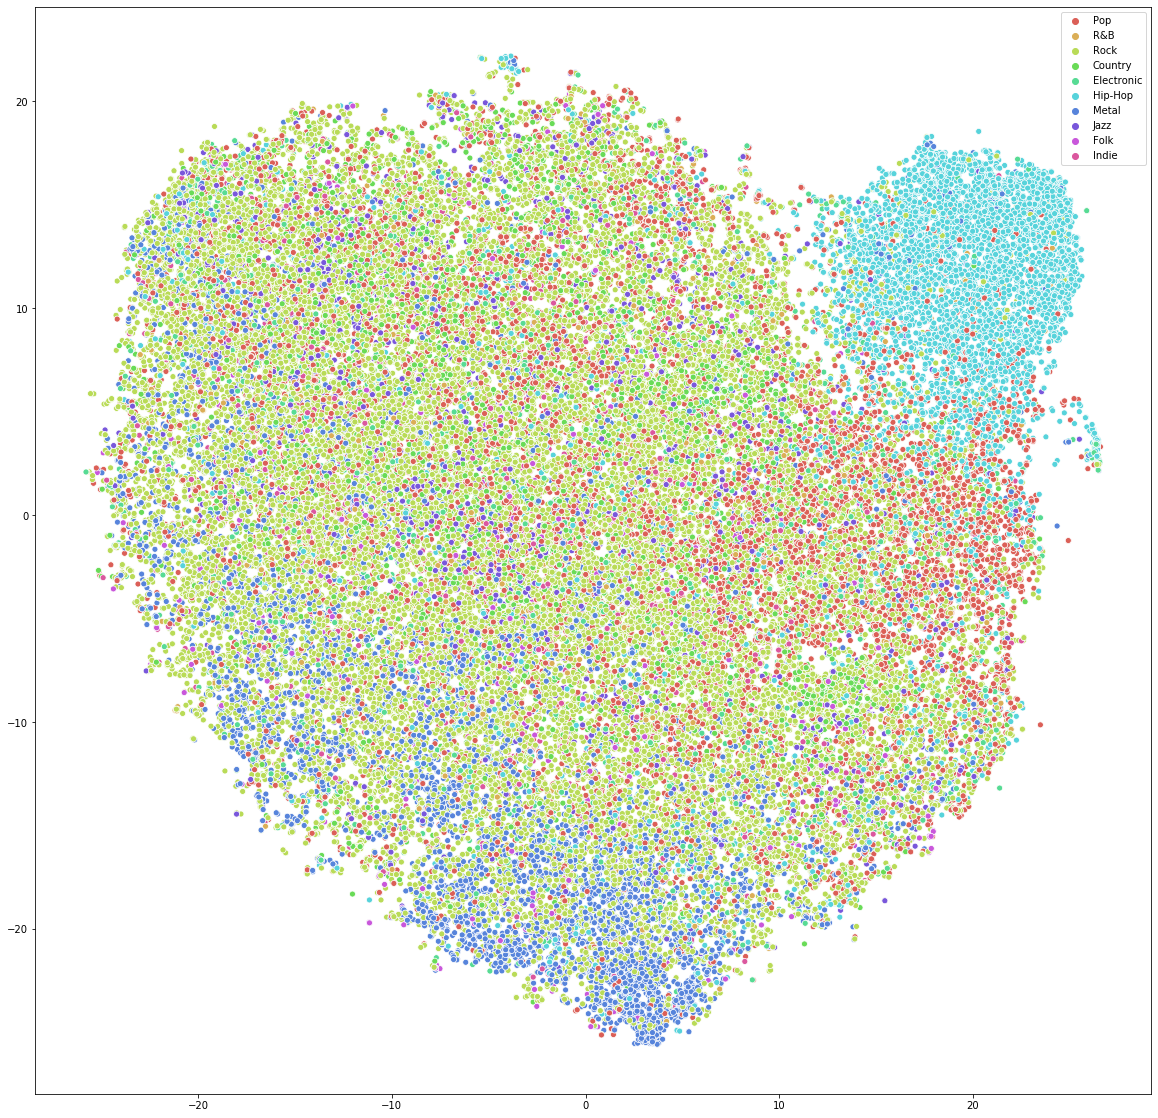

In [66]:
# visualize test word embeddings
plt.rcParams['figure.figsize']=[20,20]
ax = sns.scatterplot(test_tsne[:,0],test_tsne[:,1],hue=test_labels,
                     palette=sns.color_palette("hls", 10))
plt.savefig('Pictures/word-embedding categories.png')

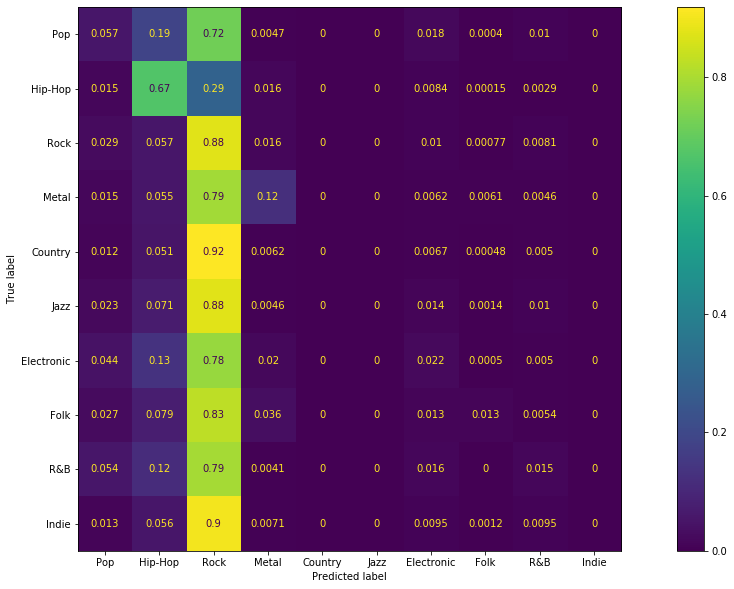

In [68]:
plt.rcParams['figure.figsize'] = [20,10]
sklearn.metrics.plot_confusion_matrix(best_clfs['RandomForest'][10], 
                                      test_embedding_10, lyrics_test['genre'],
                                      display_labels=genre_dict.keys(),normalize='true')
#plt.savefig('Pictures/confusion_matrix_naive_bayes')

### Using cosine similarity as the benchmark 

In [38]:
train_embedding_100 = np.array([list(train_D2V_100[index]) for index in lyrics_train.index])
test_embedding_100 = p.map(train_D2V_100.infer_vector, lyrics_test['normalized'])
test_embedding_100 = np.array([list(x) for x in test_embedding_100])

In [18]:
genres = pd.unique(lyrics_df['genre'])
genres

[Pop, Hip-Hop, Rock, Metal, Country, Jazz, Electronic, Folk, R&B, Indie]
Categories (10, object): [Pop, Hip-Hop, Rock, Metal, ..., Electronic, Folk, R&B, Indie]

In [39]:
from scipy.spatial.distance import cosine
predict_labels = []
for x in test_embedding_100:
    temp = [(g,cosine(x,train_D2V_100[g])) for g in genres]
    predict_labels.append(sorted(temp,key=lambda x:x[1])[0][0])
predict_labels

['Jazz',
 'Electronic',
 'Electronic',
 'Jazz',
 'Pop',
 'Electronic',
 'R&B',
 'Indie',
 'Rock',
 'Pop',
 'Electronic',
 'Electronic',
 'Country',
 'Folk',
 'Electronic',
 'Folk',
 'Folk',
 'Metal',
 'Metal',
 'Metal',
 'Electronic',
 'Pop',
 'Electronic',
 'Hip-Hop',
 'Metal',
 'Folk',
 'R&B',
 'Jazz',
 'Electronic',
 'R&B',
 'Pop',
 'Pop',
 'R&B',
 'Rock',
 'Metal',
 'Pop',
 'Hip-Hop',
 'Electronic',
 'R&B',
 'Jazz',
 'Metal',
 'Metal',
 'Pop',
 'Electronic',
 'Electronic',
 'Folk',
 'Country',
 'Jazz',
 'R&B',
 'Metal',
 'Jazz',
 'Metal',
 'Electronic',
 'Country',
 'R&B',
 'Pop',
 'Electronic',
 'Metal',
 'Pop',
 'Folk',
 'Pop',
 'Metal',
 'R&B',
 'Metal',
 'R&B',
 'Pop',
 'Electronic',
 'Jazz',
 'Electronic',
 'R&B',
 'Electronic',
 'Electronic',
 'Folk',
 'R&B',
 'R&B',
 'Metal',
 'Pop',
 'Pop',
 'Electronic',
 'Folk',
 'Hip-Hop',
 'Hip-Hop',
 'Pop',
 'Pop',
 'R&B',
 'Metal',
 'Pop',
 'Pop',
 'Pop',
 'Metal',
 'Hip-Hop',
 'Pop',
 'Electronic',
 'Electronic',
 'R&B',
 'Indie',
 '

In [40]:
sklearn.metrics.accuracy_score(predict_labels,lyrics_test['genre'])  

0.26896966436155906